# First try - RNN (No sequences with variable length, 1 feature : urlCode)

### In this notebook, I wrote a RNN, using only the urlCode as feature (categorical). With just this feature and without dividing the complete log sequence in sessions, I obtained a % of correct predicted URL between 14 and 20.

In [1]:
# Recurrent Neural Network


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [2]:
# Importing the data set and splitting in train and test
dataset_train = pd.read_csv('time_series_all_train.csv', names= ["secFromPrevPage", "urlCode"], header= None)
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train

,secFromPrevPage,urlCode
0,0,238
1,580,3
2,220,49
3,660,3
4,100,0
5,300,43
6,20,42
7,870,238
8,12330,0
9,2400,3


In [4]:
training_set.shape

(17448, 1)

In [5]:
onehotencoder = OneHotEncoder(categories='auto')
training_set = training_set.reshape(-1,1)
print(training_set.shape)


training_set_scaled = onehotencoder.fit_transform(training_set).toarray()
print(training_set_scaled.shape)
#training_set_scaled[17443,:] == training_set_scaled[17446,:]
np.array_equal(training_set_scaled[17443,:],training_set_scaled[17446,:])

(17448, 1)
(17448, 3436)


True

In [6]:
'''
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
'''

'\n# Feature Scaling\nsc = MinMaxScaler(feature_range = (0, 1))\ntraining_set_scaled = sc.fit_transform(training_set)\n'

In [7]:
#training_set_scaled

In [8]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(8, 17448):
    X_train.append(training_set_scaled[i-8:i, :])
    y_train.append(training_set_scaled[i, :])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape

(17440, 8, 3436)

In [ ]:
X_train

In [12]:
# Reshaping
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], ))

In [13]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
# Initialising the RNN
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(Flatten())


regressor.add(Dense(activation ='softmax', units = X_train.shape[2]))
regressor.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

(17440, 8, 3436)
Epoch 1/50
17440/17440 [==============================] - 56s 3ms/step - loss: 6.8707 - acc: 0.1087
Epoch 2/50
17440/17440 [==============================] - 65s 4ms/step - loss: 6.5522 - acc: 0.1096
Epoch 3/50
17440/17440 [==============================] - 55s 3ms/step - loss: 6.3585 - acc: 0.1099: 1s - loss: 6.3593 -
Epoch 4/50
17440/17440 [==============================] - 53s 3ms/step - loss: 6.2263 - acc: 0.1114: 1s - loss: 6.2
Epoch 5/50
17440/17440 [==============================] - 53s 3ms/step - loss: 6.1373 - acc: 0.1145
Epoch 6/50
17440/17440 [==============================] - 52s 3ms/step - loss: 6.0639 - acc: 0.1198: 1s - loss: 6.0613 
Epoch 7/50
17440/17440 [==============================] - 51s 3ms/step - loss: 6.0014 - acc: 0.1237
Epoch 8/50
17440/17440 [==============================] - 54s 3ms/step - loss: 5.9399 - acc: 0.1303
Epoch 9/50
17440/17440 [==============================] - 58s 3ms/step - loss: 5.8815 - acc: 0.1360
Epoch 10/50
17440/17440 [=

In [16]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('time_series_all_test.csv', names= ["secFromPrevPage", "urlCode"], header= None)
real_urls = dataset_test.iloc[:, 1:2].values

In [17]:
real_urls

array([[190],
       [191],
       [ 31],
       ...,
       [ 34],
       [  3],
       [  3]])

In [18]:
# Getting the predicted urls
dataset_total = pd.concat((dataset_train['urlCode'], dataset_test['urlCode']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 8:].values

In [20]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)

(3485, 1)


array([[ 726],
       [ 727],
       [2201],
       ...,
       [  34],
       [   3],
       [   3]])

In [21]:
inputs = onehotencoder.transform(inputs).toarray()

In [22]:
inputs.shape

(3485, 3436)

In [23]:
X_test = []
for i in range(8, 3477):
    X_test.append(inputs[i-8:i, :])
X_test = np.array(X_test)

In [24]:
X_test.shape

(3469, 8, 3436)

In [25]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))
predicted_url = regressor.predict(X_test)

In [26]:
#predicted_url = predicted_url.reshape(1,-1)
predicted_url.shape

(3469, 3436)

In [27]:
predicted_url = onehotencoder.inverse_transform(predicted_url)

In [28]:
count_total = 0
count_equal = 0
for i in range(0,len(predicted_url)):
    count_total += 1
    if predicted_url[i] == real_urls[i]:
        count_equal += 1
print("{} correct URL predicted over {} total URLs.".format(count_equal,count_total))
print("Precision: %{}".format(count_equal/count_total))

491 correct URL predicted over 3469 total URLs.
Precision: %0.14153934851542233


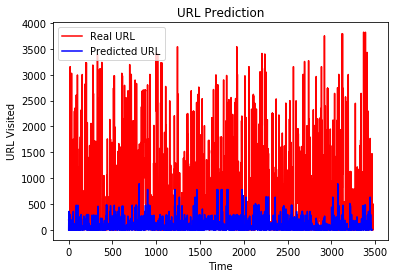

In [29]:
# Visualising the results
plt.plot(real_urls, color = 'red', label = 'Real URL')
plt.plot(predicted_url, color = 'blue', label = 'Predicted URL')
plt.title('URL Prediction')
plt.xlabel('Time')
plt.ylabel('URL Visited')
plt.legend()
plt.show()